In [570]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [571]:
# Charger les données
data = pd.read_csv("total_out_clean.csv")
data.shape


(753, 13)

In [572]:
data.describe()

,Unnamed: 0,price,old_price,voyageurs,rooms,bed,bathroom,new_rating
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,603.264276,1787.543161,2671.986720,2.952191,1.216467,1.804781,1.144754,4.827955
std,344.195714,1014.745970,1468.928371,1.352833,0.552696,1.058340,0.384579,0.178796
min,0.000000,338.000000,422.000000,1.000000,1.000000,1.000000,1.000000,3.330000
25%,312.000000,1172.000000,1705.000000,2.000000,1.000000,1.000000,1.000000,4.750000
50%,601.000000,1530.000000,2325.000000,2.000000,1.000000,2.000000,1.000000,4.870000
75%,905.000000,2158.000000,3176.000000,4.000000,1.000000,2.000000,1.000000,4.950000
max,1187.000000,15336.000000,19170.000000,11.000000,5.000000,8.000000,4.000000,5.000000


In [573]:
# Mettre toutes les premières lettres des colonnes en minuscules
data = data.rename(columns=lambda x: x.lower())
data.head()

,unnamed: 0,price,old_price,type,pays,region,voyageurs,rooms,bed,bathroom,period_start,period_end,new_rating
0,0,2920.0,6084.0,cottage,Espagne,Madrid,9,3,8,2,2024-07-31,2024-08-31,4.97
1,1,1500.0,1705.0,hébergement,Espagne,Trevélez,2,1,1,1,2024-07-31,2024-08-31,4.89
2,2,1968.0,3280.0,loft,Espagne,Madrid,2,1,1,1,2024-07-31,2024-08-31,4.81
3,3,2353.0,2870.0,loft,Espagne,Séville,4,2,3,1,2024-07-31,2024-08-31,4.96
4,4,2129.0,2505.0,appartement,Espagne,Madrid,2,1,1,1,2024-07-31,2024-08-31,4.83


# Distribution des caractéristiques

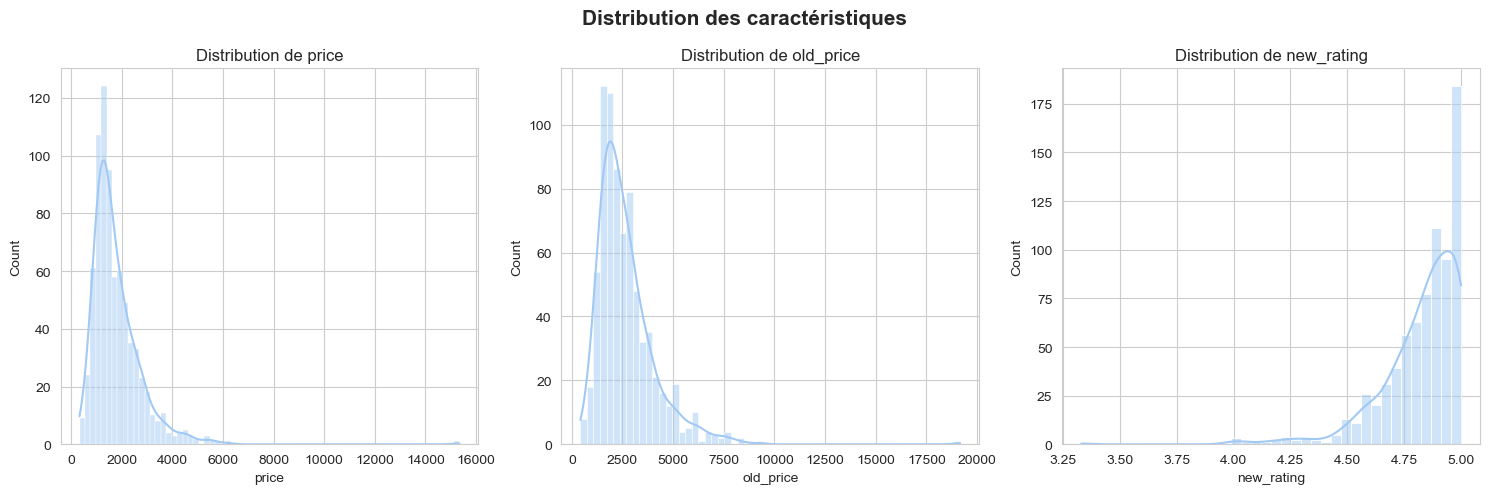

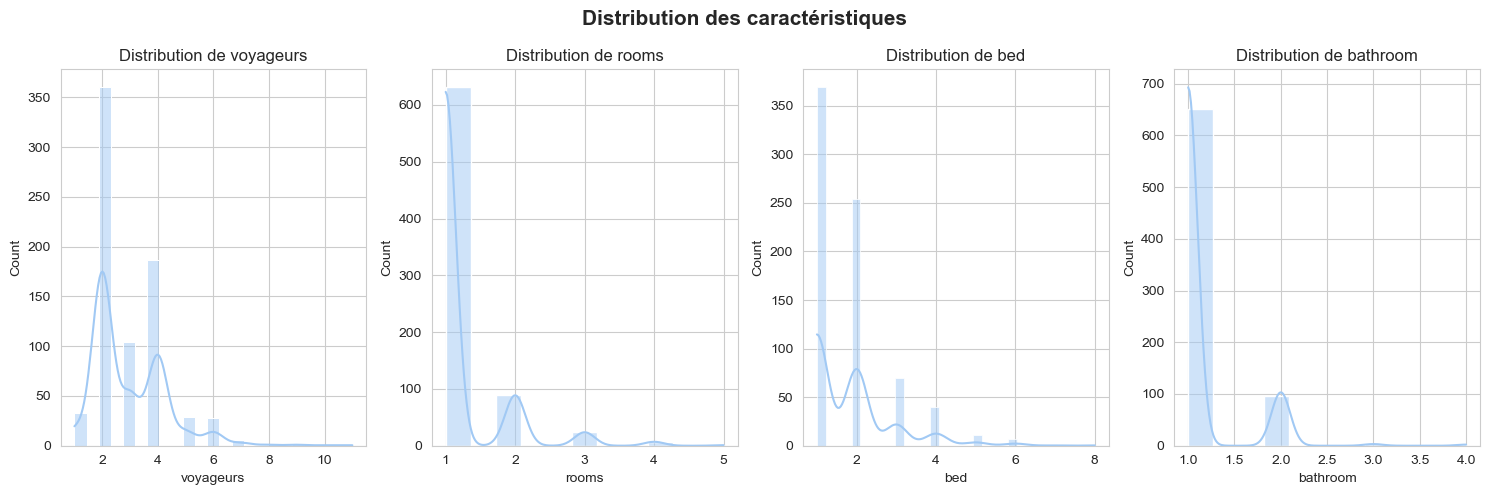

In [574]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir le style de seaborn pour avoir une grille en arrière-plan
sns.set_style("whitegrid")

numerical_features = ['price', 'old_price', 'new_rating', 'voyageurs', 'rooms', 'bed', 'bathroom']

# Divisez les caractéristiques numériques en deux listes
numerical_features_1 = numerical_features[:len(numerical_features)//2]
numerical_features_2 = numerical_features[len(numerical_features)//2:]

# Affichage des histogrammes sur deux lignes
for features in [numerical_features_1, numerical_features_2]:
    plt.figure(figsize=(15, 5))
    plt.suptitle("Distribution des caractéristiques" , fontweight='bold', fontsize=15)
    for feature in features:
        plt.subplot(1, len(features), features.index(feature) + 1)
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribution de {feature}')
    plt.tight_layout()
    plt.show()


# Répartition des types de logement

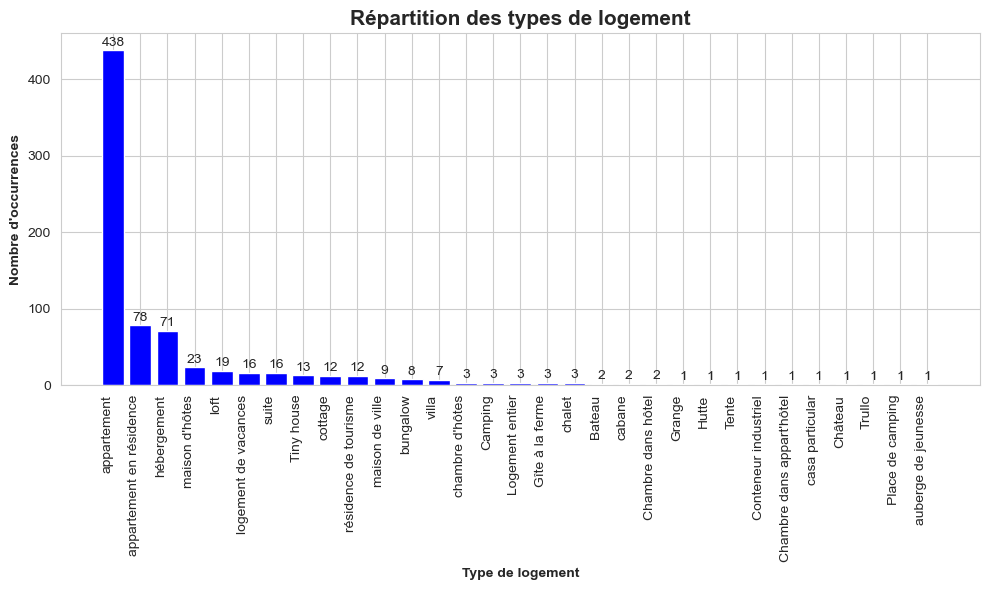

In [575]:
# Compter les occurrences de chaque type de logement
type_counts = data['type'].value_counts()

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(10, 6))

# Tracer l'histogramme
bars = ax.bar(type_counts.index, type_counts.values, color='blue')

# Ajouter les labels des axes et le titre
ax.set_xlabel('Type de logement', fontweight='bold', fontsize=10)
ax.set_ylabel('Nombre d\'occurrences', fontweight='bold', fontsize=10)
ax.set_title('Répartition des types de logement', fontweight='bold', fontsize=15)

# Ajouter une grille
ax.grid(True)

# Placer la grille en arrière-plan
ax.set_axisbelow(True)

# Ajouter les étiquettes sur les barres
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),  # 3 points de décalage vertical
                textcoords="offset points",
                ha='center', va='bottom')

# Faire en sorte que les étiquettes sur l'axe x soient mieux visibles
plt.xticks(rotation=90, ha='right')

# Afficher le graphique
plt.tight_layout()
plt.show()


# Les 5 types de logement les plus fréquents


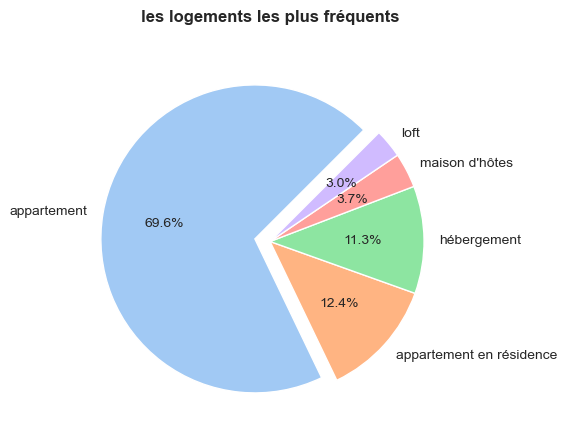

In [576]:
# Filtrer les types de logement qui ont une valeur supérieure ou égale à 19
filtered_types = type_counts[type_counts >=19]

# Configurer l'explosion des segments du graphique circulaire pour mettre en évidence le segment le plus grand
explode = [0.1 if i == filtered_types.idxmax() else 0 for i in filtered_types.index]

# Générer le graphique circulaire
filtered_types.plot(kind='pie', figsize=(5, 5), explode=explode, startangle=45,
                    shadow=False, autopct='%.1f%%')

# Ajouter un titre et ajuster les étiquettes
plt.title("les logements les plus fréquents", fontweight='bold', pad=20)
plt.ylabel("")  # Enlever le label de l'axe y
plt.show()


# Les logements les plus chers pour chaque type

In [577]:
# Définir l'ordre souhaité des colonnes
desired_columns_order = ['type', 'price', 'region', 'pays']

# Réorganiser les colonnes dans le DataFrame
top_expensive_properties_df = top_expensive_properties_df.reindex(columns=desired_columns_order)

# Trier le DataFrame par prix de manière décroissante
top_expensive_properties_df = top_expensive_properties_df.sort_values(by='price', ascending=False)

# Afficher le DataFrame des logements les plus chers pour chaque type dans l'ordre personnalisé et triés par prix
print(top_expensive_properties_df)

                          type    price                               region  \
672   appartement en résidence  15336.0                            Albufeira   
182                      villa   6200.0                              Mascali   
198                    cottage   5805.0                  Francavilla Fontana   
721       logement de vacances   5535.0                                Lagos   
676                appartement   5408.0                              Peniche   
704                hébergement   4743.0                            Arraiolos   
693      résidence de tourisme   4677.0                            Albufeira   
736                       loft   3141.0                                Porto   
269                     chalet   3086.0                 Châtillon-sur-Cluses   
159             maison d'hôtes   2956.0                                Lasne   
268                      suite   2727.0                               Bommes   
322            maison de ville   2659.0 

# Analayse 
Cette analyse met en lumière la diversité des logements haut de gamme dans différentes régions européennes. Outre les villas et les chalets, les appartements en résidence, bien que moins coûteux, restent des choix populaires, en particulier au Portugal et en Italie. Cette tendance soulève la question de savoir comment les infrastructures de ces régions soutiennent et favorisent le développement de ces types d'hébergements, et comment cela influence les choix des voyageurs aisés. Une recherche approfondie pourrait explorer les politiques locales et les investissements qui favorisent la croissance de ces logements, ainsi que leur impact sur le tourisme haut de gamme et le développement économique régional.

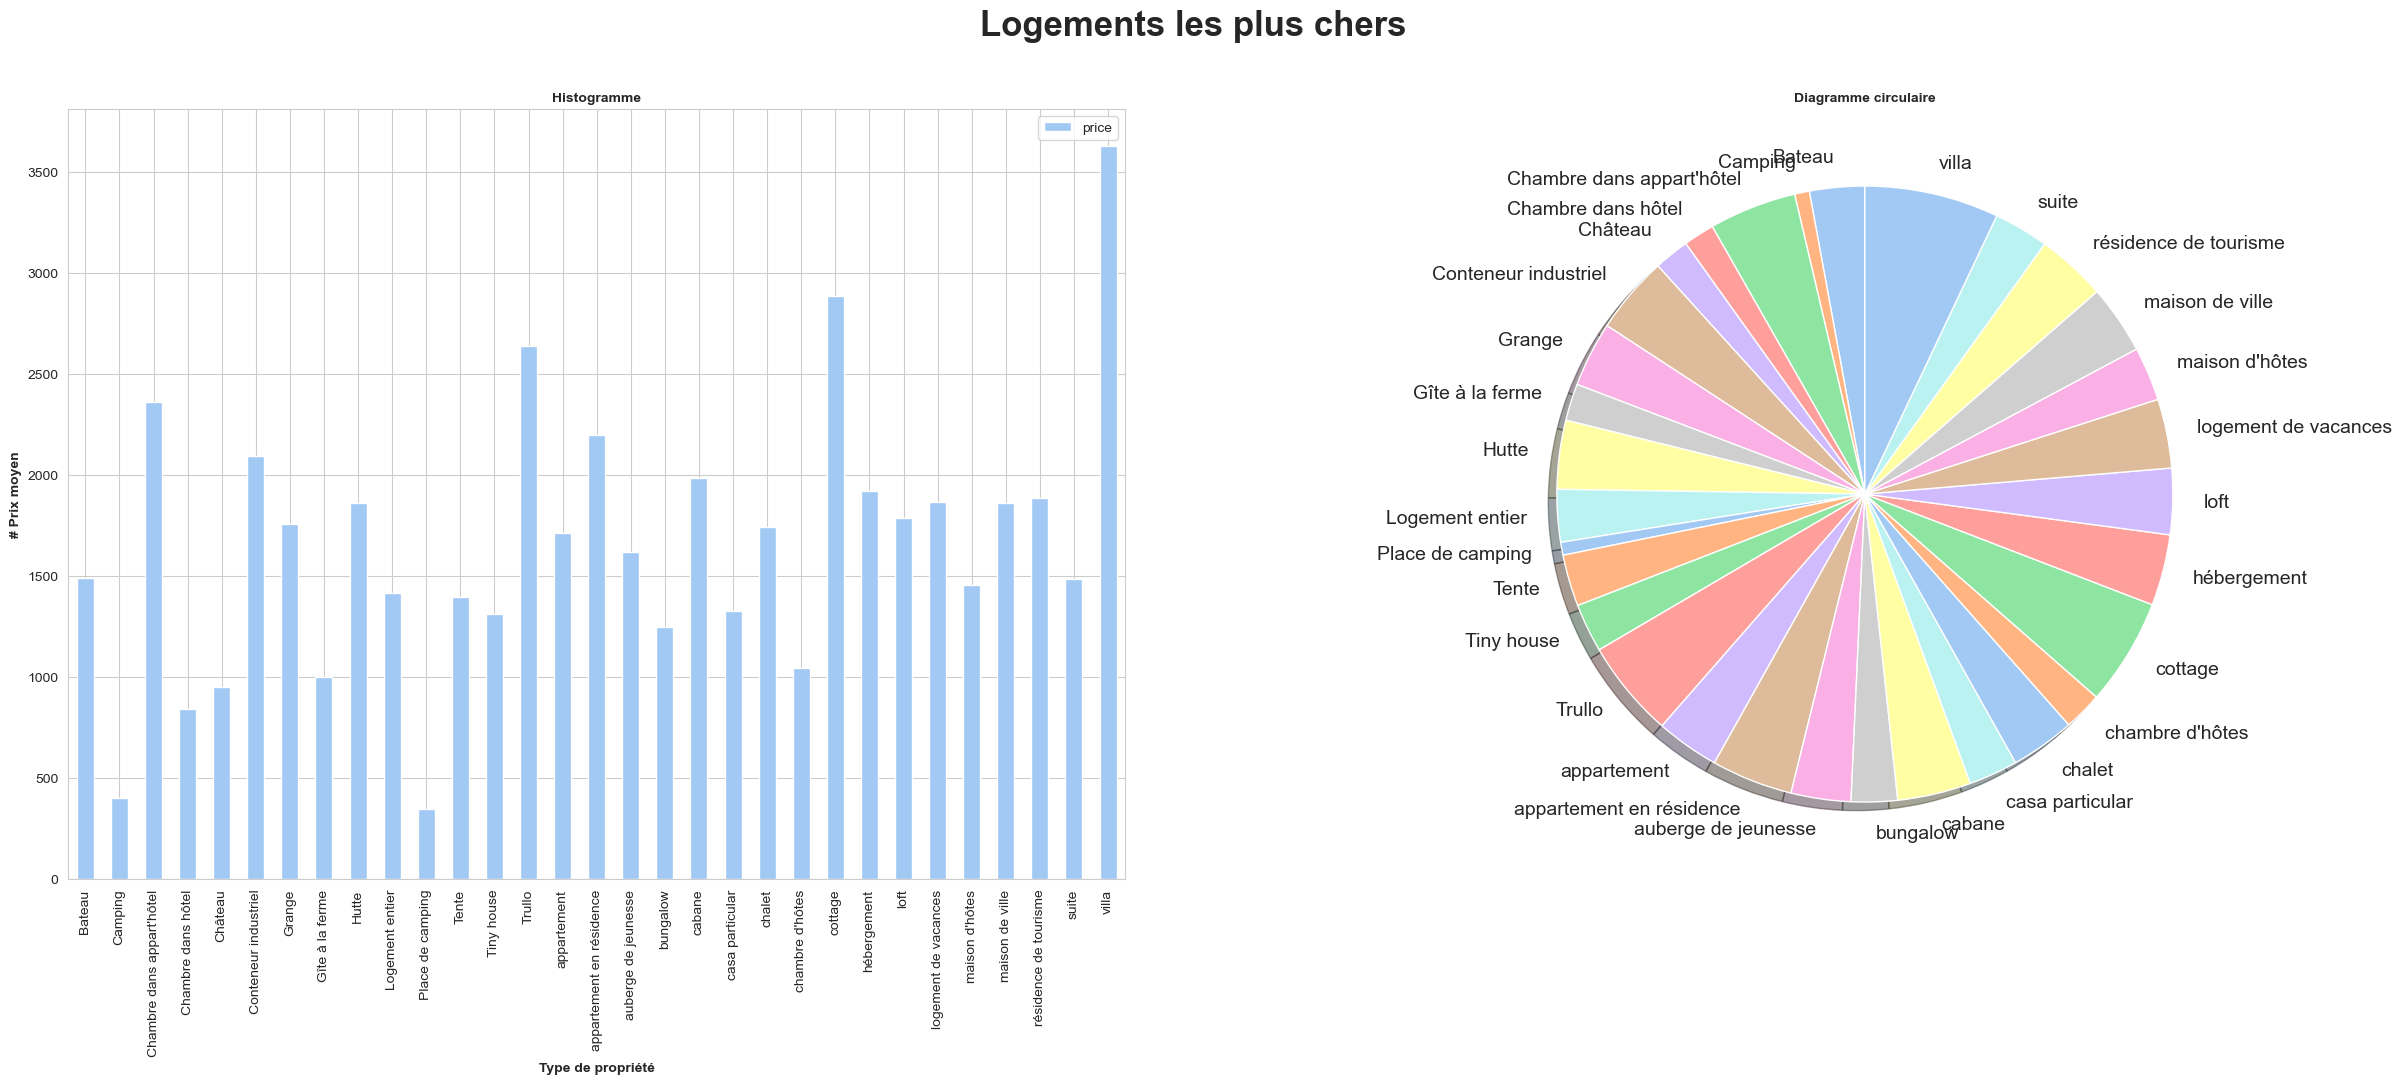

In [578]:
# Groupement par type de propriété et calcul de la moyenne des prix
propertyTypeGB = data.groupby('type').agg({'price':'mean'}).reset_index()

# Création d'une colormap personnalisée
my_norm = plt.Normalize(vmin=0, vmax=len(propertyTypeGB))
my_cmap = plt.cm.get_cmap('twilight')

# Création de la figure et des sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Logements les plus chers', fontweight='bold', fontsize=25)

# Tracé de l'histogramme
propertyTypeGB.plot(kind='bar', x='type', y='price', figsize=(30,5), ax=ax1)
ax1.set_title('Histogramme', fontweight='bold', fontsize=10)
ax1.set_ylabel('# Prix moyen', fontweight='bold')
ax1.set_xlabel('Type de propriété', fontweight='bold')

# Tracé du diagramme circulaire (Pie chart)
propertyTypeGB.plot(kind='pie', x='type', y='price', figsize=(30,10), startangle=90, shadow=True, labels=propertyTypeGB['type'].unique(), legend=False, fontsize=14, ax=ax2)
ax2.set_title('Diagramme circulaire', fontweight='bold', fontsize=10)
ax2.set_ylabel('')
ax2.set_xlabel('')

# Ajustement de l'espacement entre les sous-graphiques
fig.subplots_adjust(hspace=0.5)

# Affichage des graphiques
plt.show()


# Analyse
Le type de logement le plus cher en moyenne est la villa, avec un prix moyen de 3627.71 €, suivi du cottage (2886.42 €) et du Trullo (2635.00 €). Les types de logement comme la chambre dans un appart'hôtel, l'appartement en résidence et le conteneur industriel ont également des prix moyens élevés, dépassant les 2000 €.

En revanche, les logements moins chers comprennent le camping (399.00 €), la place de camping (349.00 €) et la chambre dans un hôtel (839.00 €).

Cette analyse montre une variation significative des prix en fonction du type de logement, ce qui suggère que le choix du type de logement peut avoir un impact important sur le coût total du séjour.

# Répartition des types de logement pour chaque pays

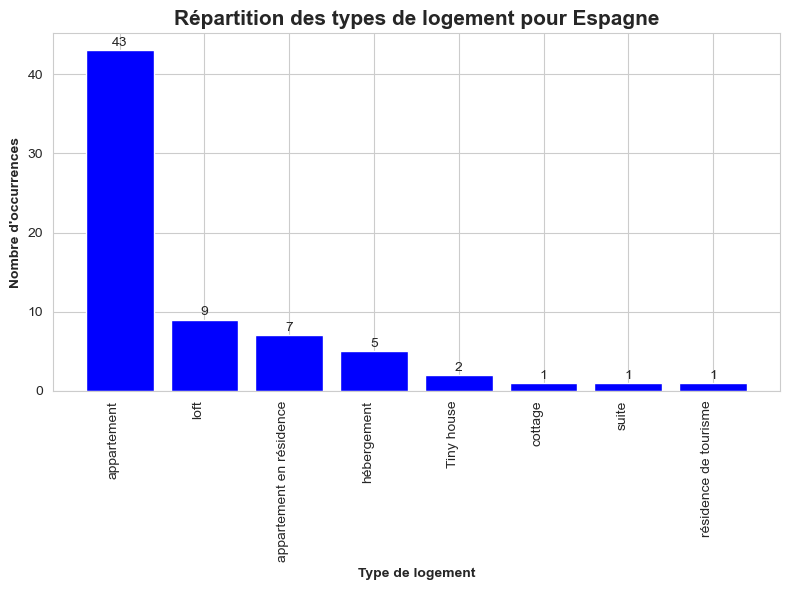

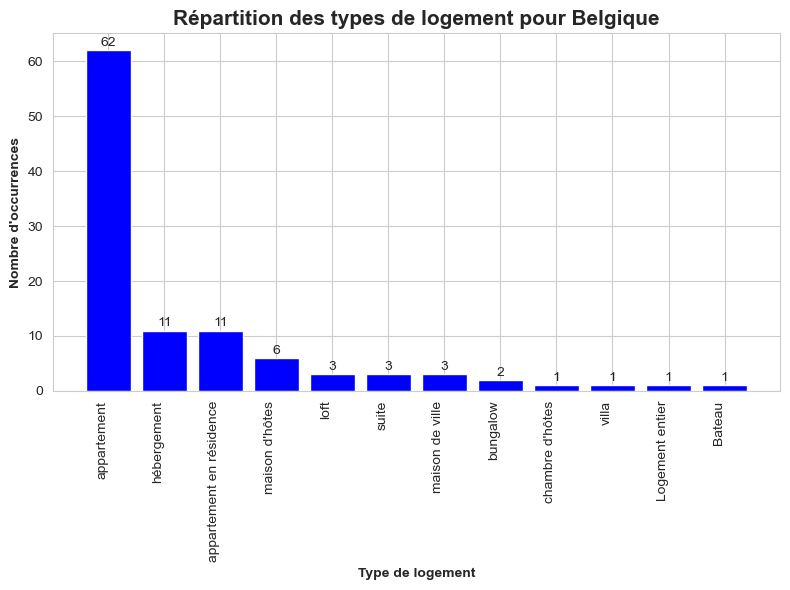

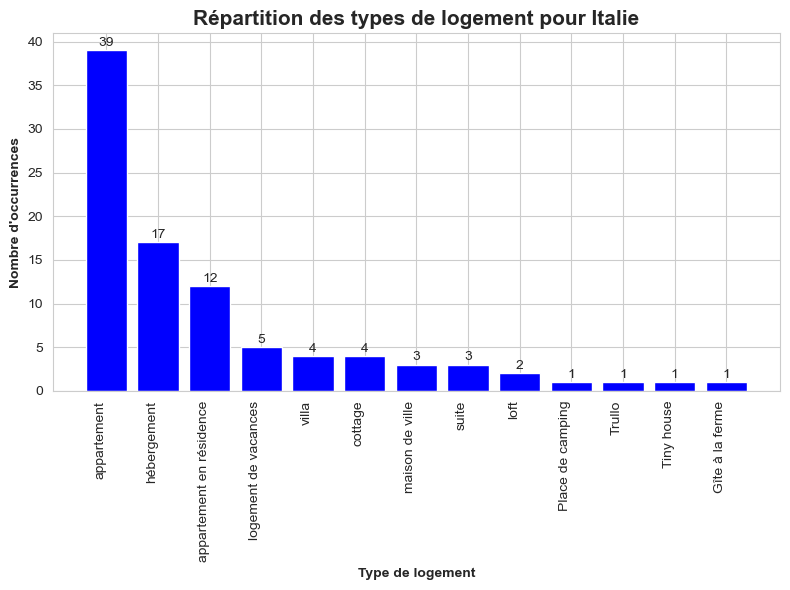

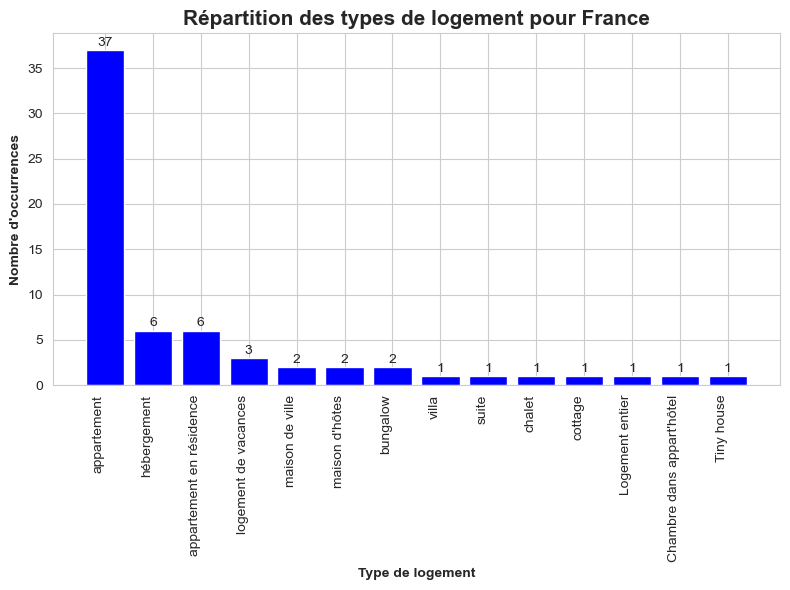

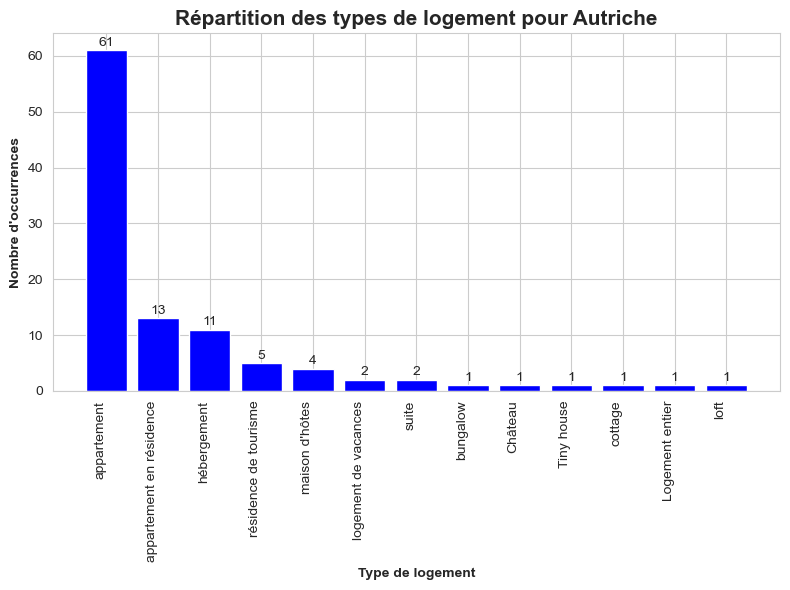

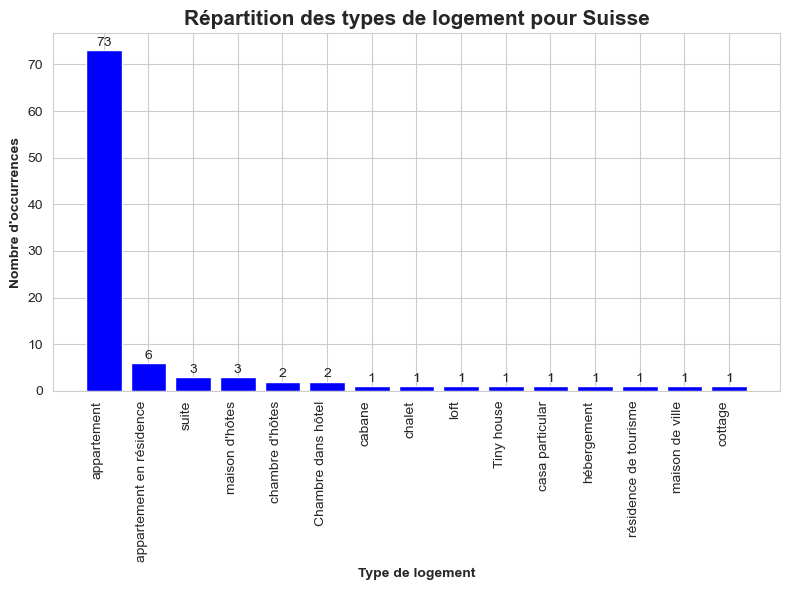

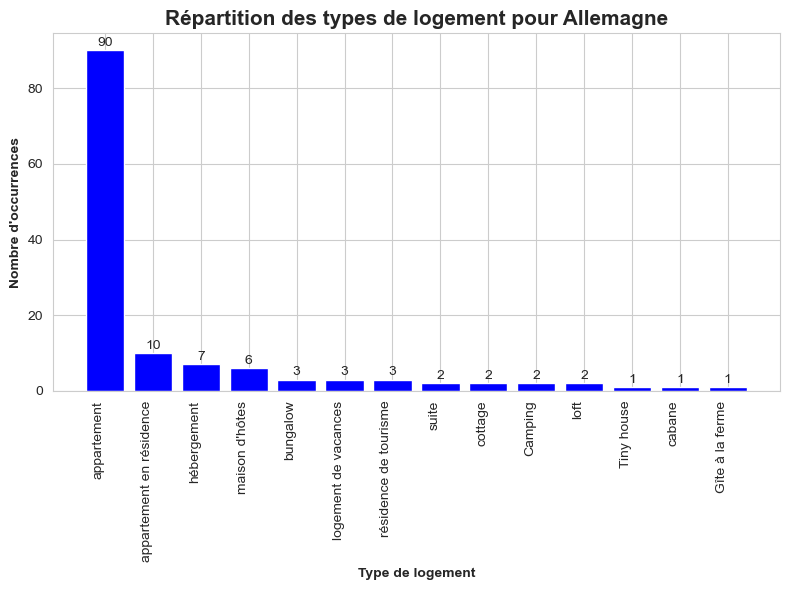

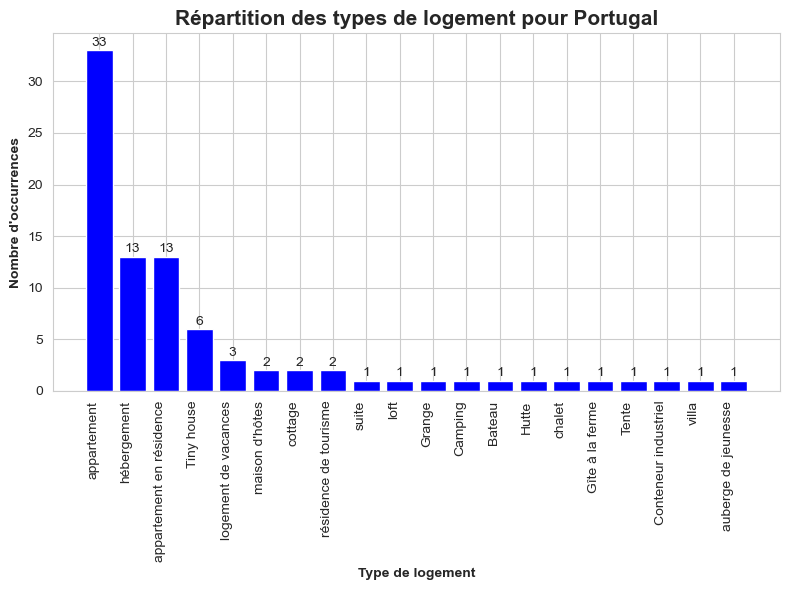

In [579]:
# Liste des pays uniques dans les données
countries = data['pays'].unique()

# Tracer un graphique séparé pour chaque pays
for country in countries:
    # Sélectionner les données pour le pays actuel
    country_data = data[data['pays'] == country]
    
    # Compter les occurrences de chaque type de logement pour le pays actuel
    type_counts = country_data['type'].value_counts()
    
    # Créer une figure et des axes pour le pays actuel
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Tracer l'histogramme pour le pays actuel
    bars = ax.bar(type_counts.index, type_counts.values, color='blue')
    
    # Ajouter les labels des axes et le titre
    ax.set_xlabel('Type de logement', fontweight='bold', fontsize=10)
    ax.set_ylabel('Nombre d\'occurrences', fontweight='bold', fontsize=10)
    ax.set_title(f'Répartition des types de logement pour {country}', fontweight='bold', fontsize=15)
    
    # Ajouter les étiquettes sur les barres
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points de décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    # Ajouter une grille
    ax.grid(True)
    ax.set_axisbelow(True)
    
    # Faire en sorte que les étiquettes sur l'axe x soient mieux visibles
    plt.xticks(rotation=90, ha='right')
    
    # Afficher le graphique
    plt.tight_layout()
    plt.show()


## Analyse 

L'examen de la répartition des types de logement dans différents pays met en lumière la diversité des options disponibles pour les voyageurs. 

Les appartements sont largement prédominants dans la plupart des pays, ce qui suggère une préférence généralisée pour ce type d'hébergement. Cependant, une variété d'autres types de logement, allant des maisons d'hôtes aux chalets en passant par les Tiny houses, est également présente, offrant aux voyageurs un large éventail d'options pour répondre à leurs besoins et préférences spécifiques.

En examinant de plus près la répartition des types de logement par pays, une question intéressante à explorer serait la suivante : Quels sont les facteurs qui influencent la popularité de certains types de logement dans chaque pays ?

Cette question pourrait ouvrir la voie à des analyses approfondies sur les tendances de voyage, les préférences culturelles, les caractéristiques géographiques et les politiques touristiques spécifiques à chaque pays, aidant ainsi à mieux comprendre les dynamiques du marché de l'hébergement et à informer les décisions des fournisseurs d'hébergement et des acteurs du tourisme.

# Prix moyens des logements par pays

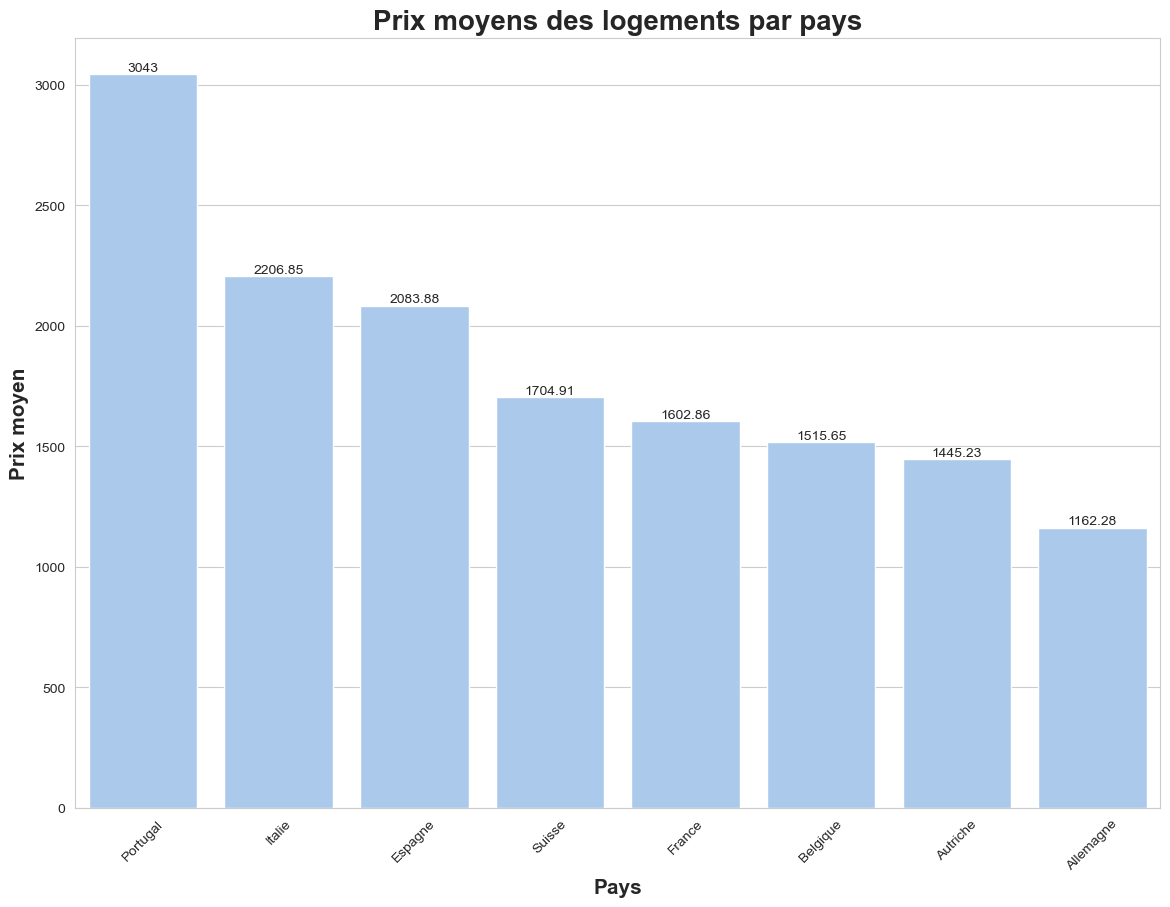

In [580]:
# Calculer le prix moyen des logements par pays
mean_prices = data.groupby('pays')['price'].mean().reset_index()

# Trier les pays par leur prix moyen de logement
mean_prices = mean_prices.sort_values(by='price', ascending=False)

# Créer le graphique à barres pour les prix moyens par pays
plt.figure(figsize=(14, 10))
ax = sns.barplot(x='pays', y='price', data=mean_prices)
ax.bar_label(ax.containers[0])

# Ajouter les titres et les étiquettes
plt.title('Prix moyens des logements par pays', fontweight='bold', fontsize=20)
plt.xlabel('Pays', fontweight='bold', fontsize=15)
plt.ylabel('Prix moyen', fontweight='bold', fontsize=15)

# Afficher le graphique
plt.xticks(rotation=45)  
plt.show()


# Analyse 

Les prix des logements varient considérablement d'un pays à l'autre, avec le Portugal affichant les prix moyens les plus élevés, suivis de l'Italie et de la Suisse.

Les destinations touristiques populaires comme Albufeira au Portugal et Benalmádena en Espagne tendent à avoir des prix plus élevés, tandis que des endroits moins développés comme Saône en France offrent des tarifs plus bas.

La disponibilité des logements, les services offerts et la saisonnalité sont des facteurs locaux clés influençant les variations de prix.

Une analyse approfondie des facteurs spécifiques à chaque région est cruciale pour comprendre les tendances du marché immobilier et orienter les décisions futures des investisseurs.

#  Prix par Région -- Pays


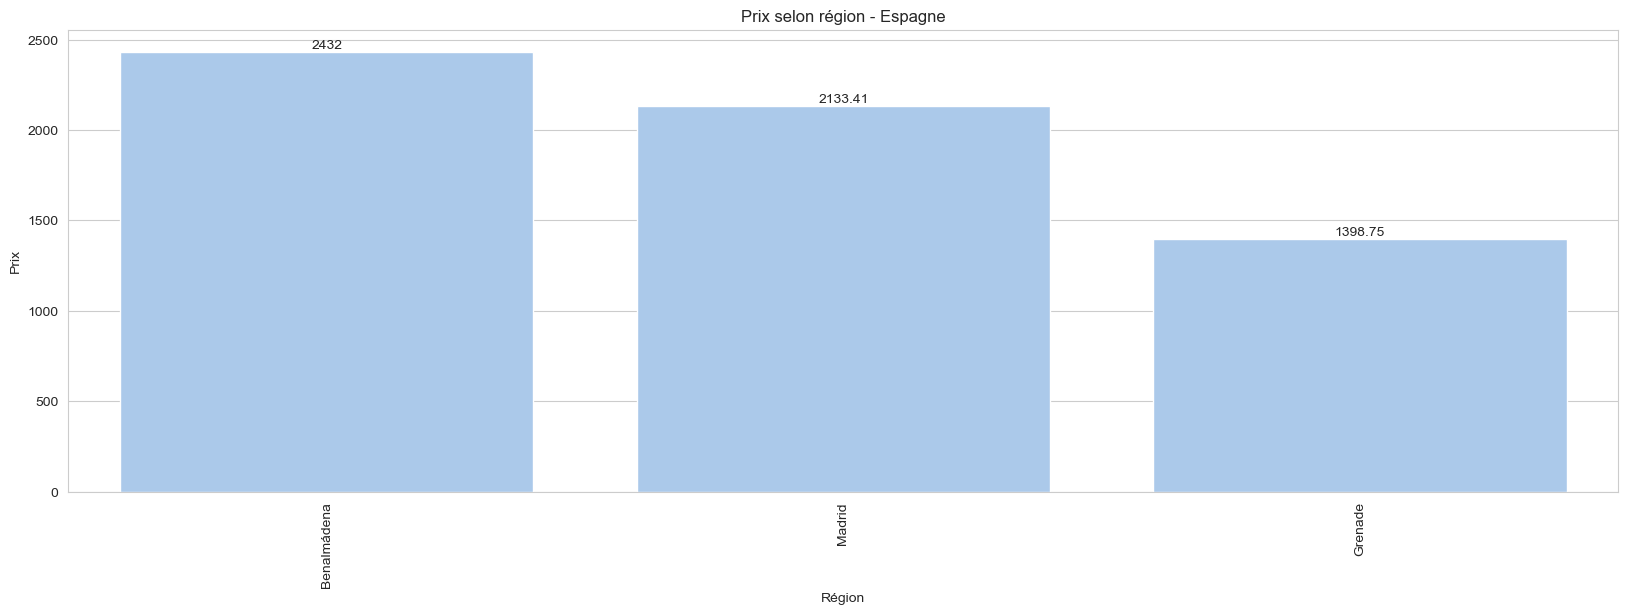

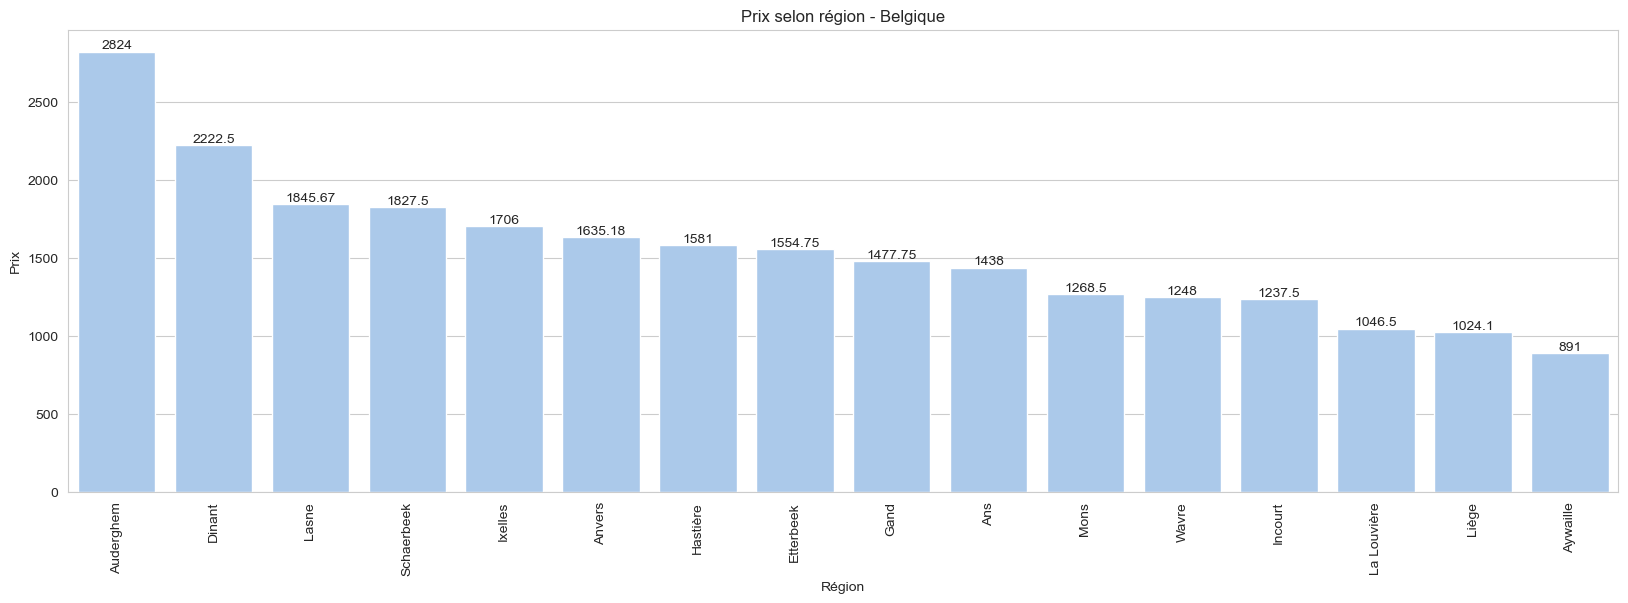

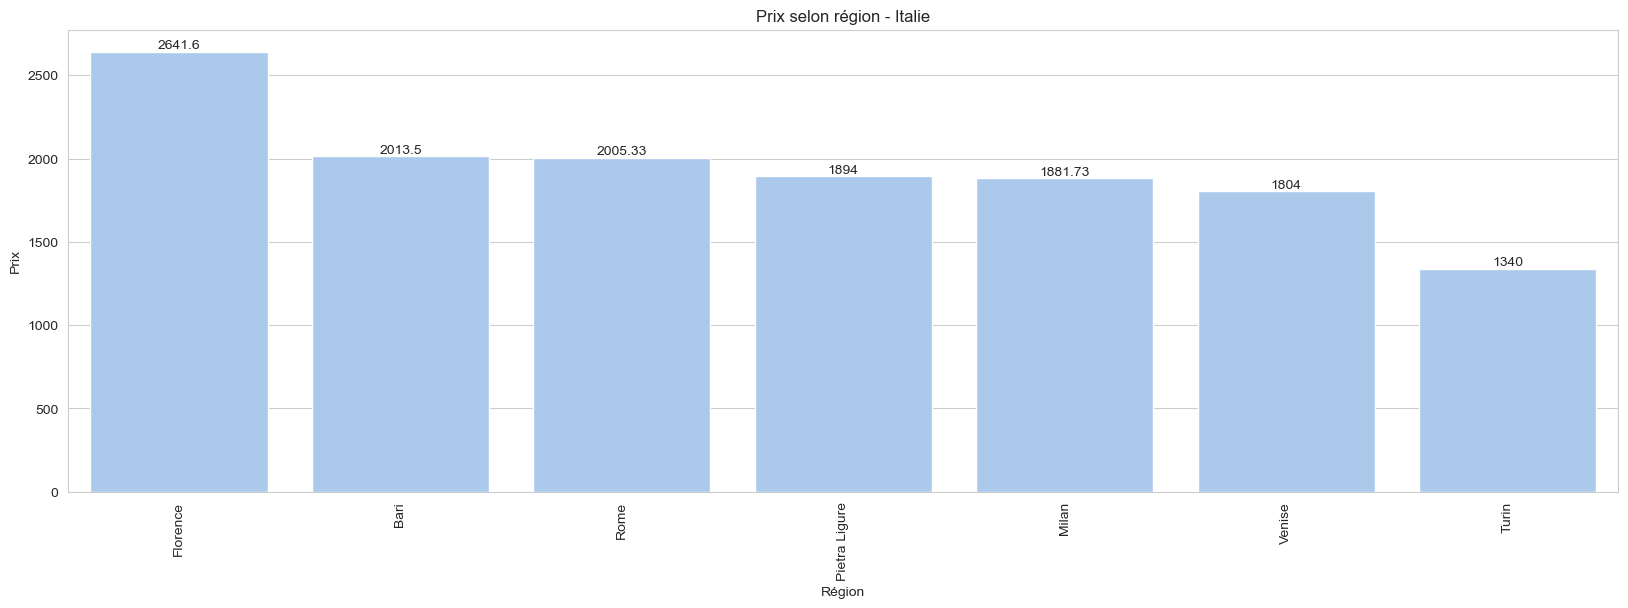

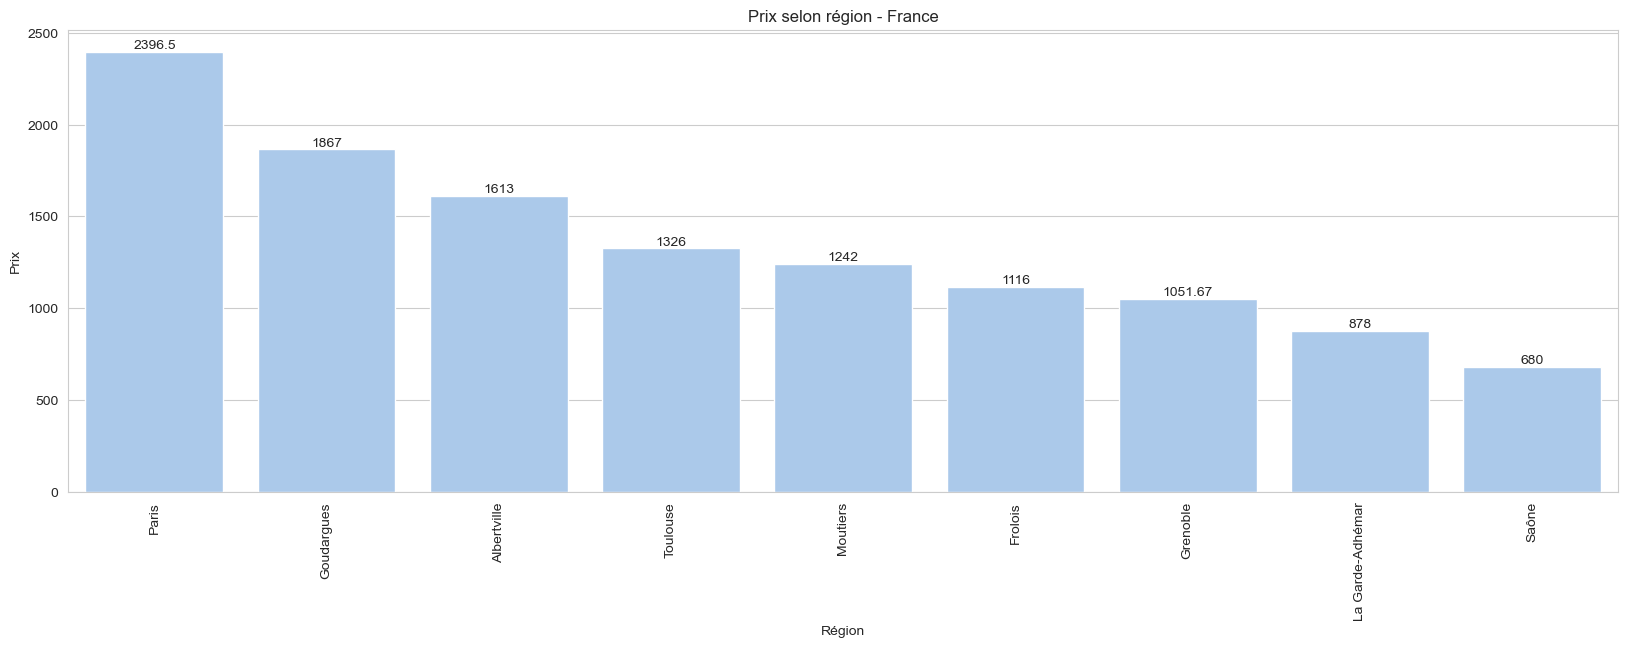

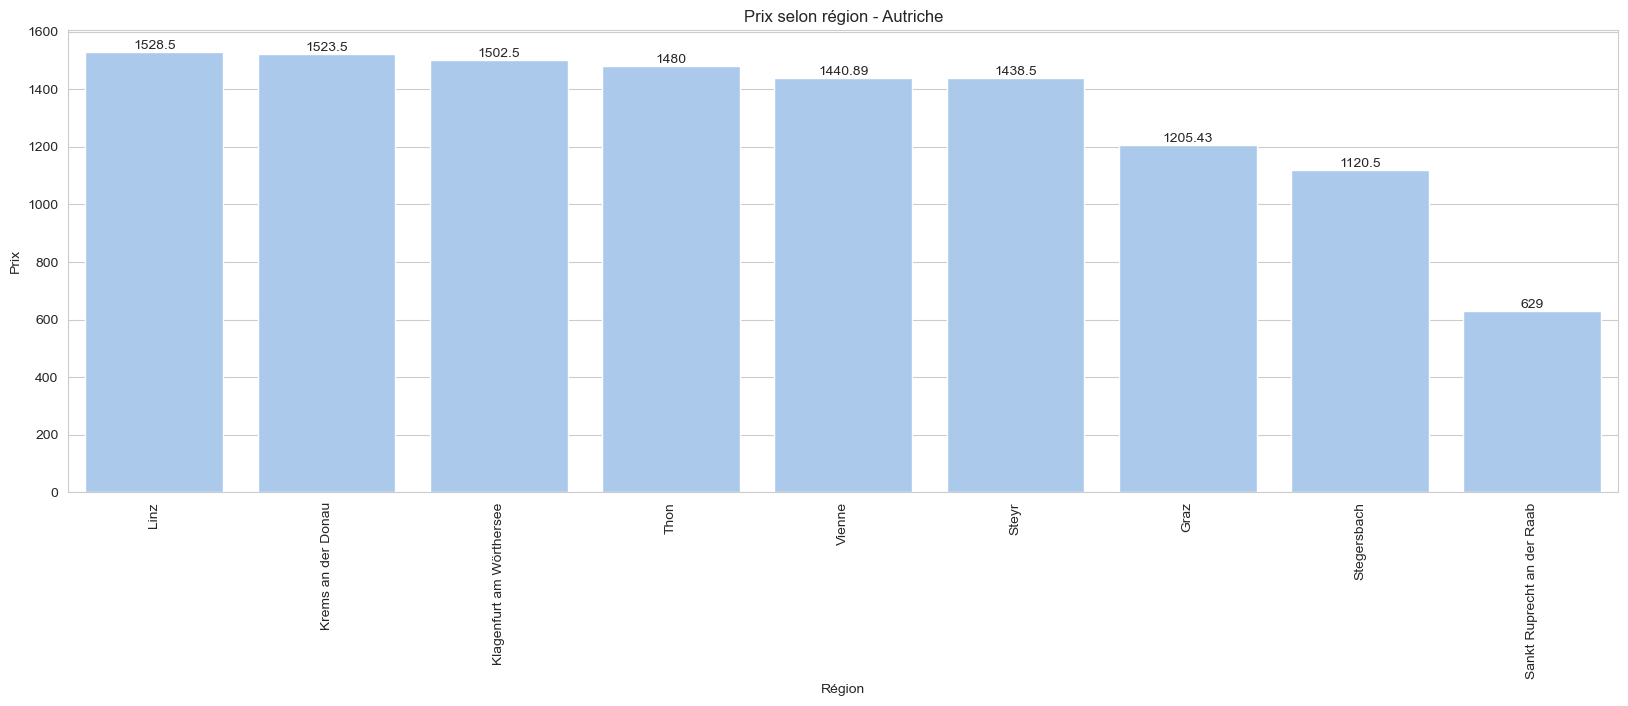

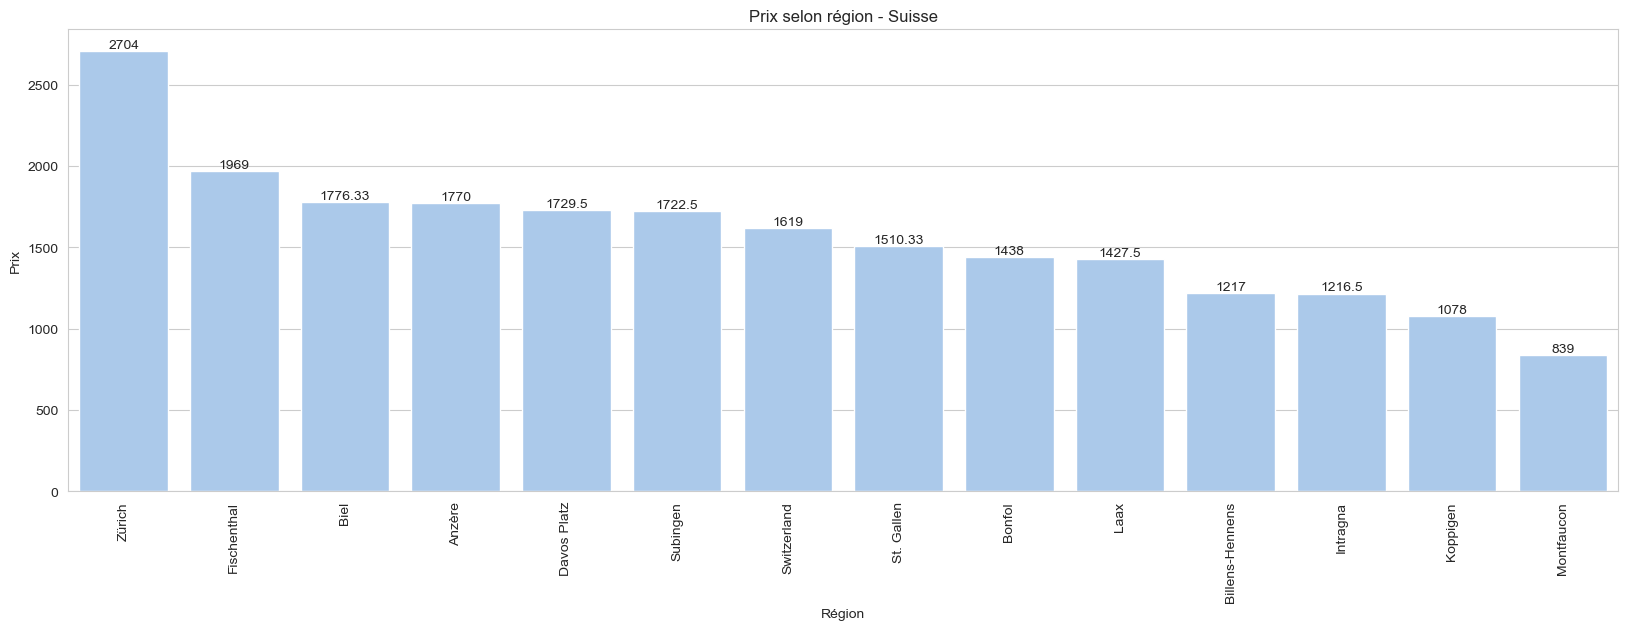

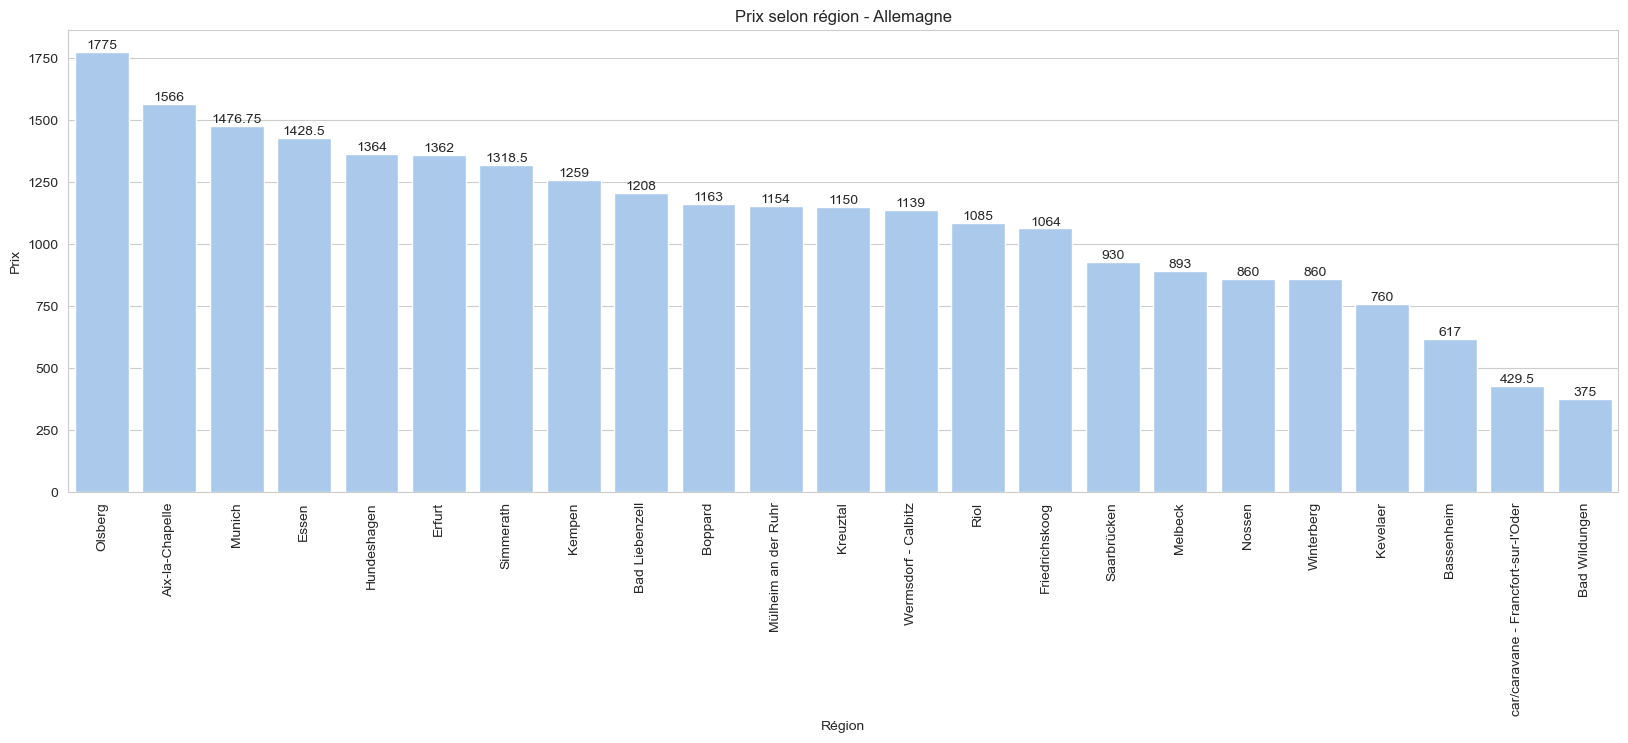

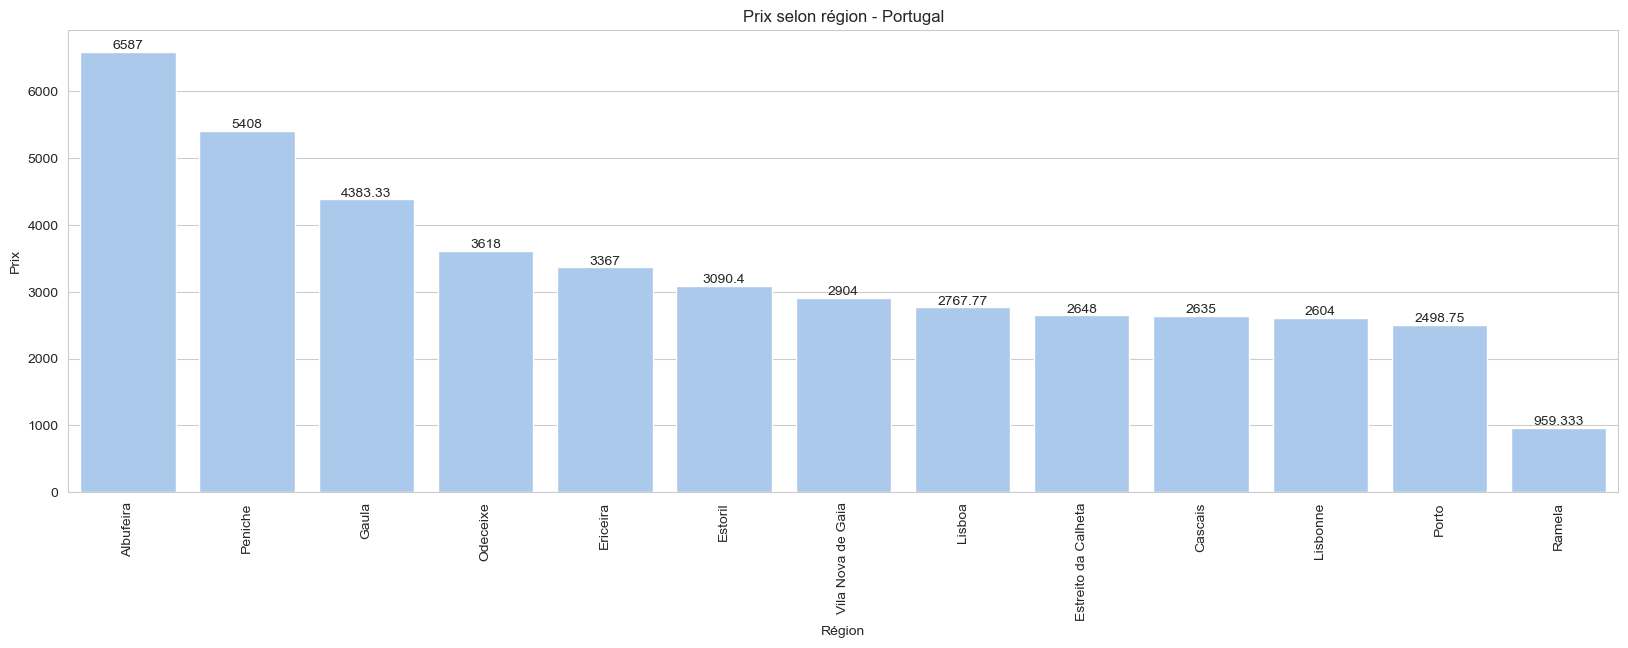

In [581]:
# Liste des pays uniques dans les données
countries = data['pays'].unique()

# Itérer sur chaque pays
for country in countries:
    # Filtrer les données pour le pays actuel
    data_country = data[data['pays'] == country]
    
    # Filtrer les régions avec plus d'un enregistrement
    data_region = data_country[['region', 'price']]
    data_region = data_region[data_region['region'].map(data_region['region'].value_counts()) > 1]
    
    # Calculer la moyenne des prix par région et trier par ordre décroissant
    mean_prices = data_region.groupby('region')['price'].mean().reset_index()
    mean_prices = mean_prices.sort_values(by='price', ascending=False)
    
    # Fusionner pour trier les données originales selon les prix moyens
    data_region_sorted = data_region.merge(mean_prices, on='region', suffixes=('', '_mean')).sort_values(by='price_mean', ascending=False)
    
    # Créer le graphique à barres pour le pays actuel
    plt.figure(figsize=(20, 6))
    ax = sns.barplot(x='region', y='price', data=data_region_sorted, order=mean_prices['region'], errorbar=None)
    ax.bar_label(ax.containers[0])
    plt.title(f'Prix selon région - {country}')
    plt.xlabel('Région')
    plt.ylabel('Prix')
    plt.xticks(rotation=90)
    plt.show()


# Analyse

Les régions les plus chères, comme Albufeira au Portugal, Benalmádena en Espagne et Cascais au Portugal, attirent des prix élevés en raison de leur attrait touristique ou de leur statut de zones métropolitaines prisées, offrant une variété d'attractions populaires. En revanche, des endroits moins développés ou moins connus comme Saône en France, Thon en Autriche et Frolois en France offrent des prix plus bas mais avec moins d'infrastructures touristiques majeures.

Les variations de prix sont influencées par des facteurs locaux tels que la disponibilité des logements, les services proposés et la saisonnalité. Les zones avec une offre limitée peuvent voir des prix plus élevés en raison de la forte demande, tandis que les périodes de basse saison peuvent entraîner des réductions temporaires.

# Boxplot des Prix des Logements par Pays


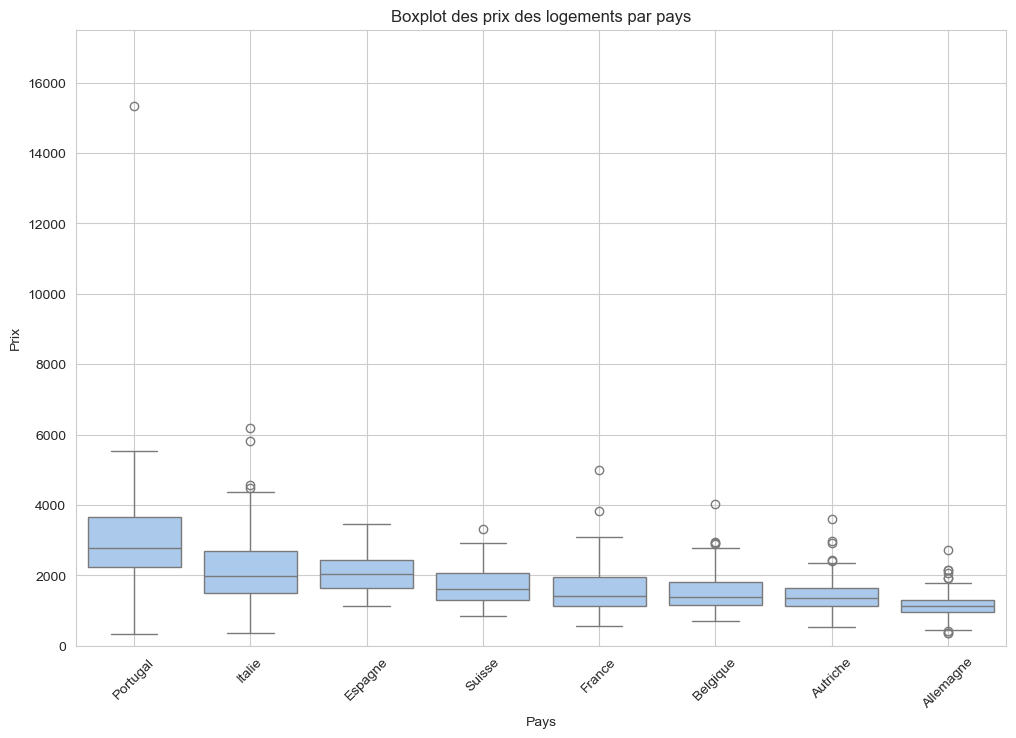

In [582]:
# Calculer la moyenne des prix par pays et trier par ordre décroissant
mean_prices = data.groupby('pays')['price'].mean().reset_index()
mean_prices = mean_prices.sort_values(by='price', ascending=False)

# Créer un boxplot avec seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='pays', y='price', order=mean_prices['pays'])

# Ajouter des titres et des étiquettes
plt.title('Boxplot des prix des logements par pays')
plt.xlabel('Pays')
plt.ylabel('Prix')

# Définir l'échelle de l'axe y
plt.ylim(0, 17500)  # Remplacez les valeurs 0 et 17500 par les limites de votre choix

# Afficher le boxplot
plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe des x pour une meilleure lisibilité
plt.grid(True)
plt.show()

# Analyse

Portugal présente la plus grande variation de prix, avec la médiane la plus élevée et des outliers significatifs.

Belgique, Autriche, et Allemagne ont des médianes de prix plus basses et des plages interquartiles plus étroites.

Suisse, France, et Italie montrent des distributions de prix similaires avec des médianes élevées et des valeurs interquartiles larges.

Espagne a une médiane comparable à la Suisse mais une distribution plus étendue

ce qui peut impacter sur les futures modèles ( fausser les prédictions et diminuer la précision du modèle)


# Comparaison des prix moyens actuels et anciens des logements Airbnb

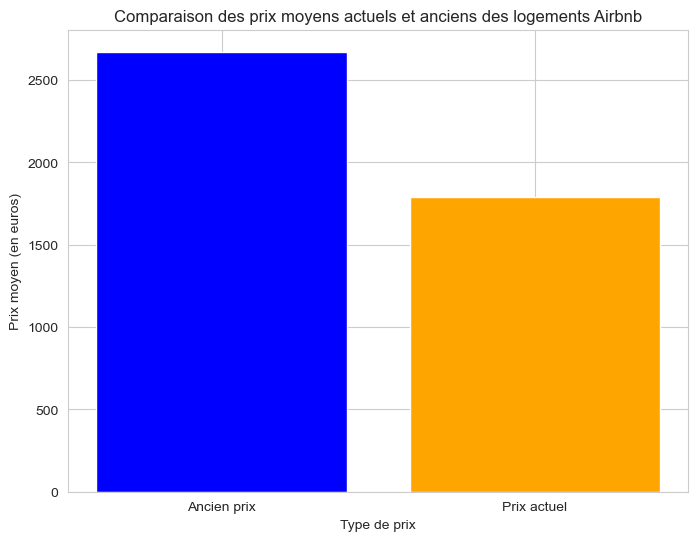

In [583]:
# Définition des moyennes des prix
average_price_current = data['price'].mean()
average_price_old = data['old_price'].mean()

# Créer une liste des prix et des labels
prices = [average_price_current, average_price_old]
labels = ['Prix actuel', 'Ancien prix']

# Trier les prix et les labels par ordre décroissant des prix
sorted_indices = sorted(range(len(prices)), key=lambda k: prices[k], reverse=True)
sorted_prices = [prices[i] for i in sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]

# Création du diagramme à barres
plt.figure(figsize=(8, 6))
plt.bar(sorted_labels, sorted_prices, color=['blue', 'orange'])
plt.title('Comparaison des prix moyens actuels et anciens des logements Airbnb')
plt.xlabel('Type de prix')
plt.ylabel('Prix moyen (en euros)')
plt.show()


# Analyse 

Le prix moyen des logements Airbnb pour le mois actuel est d'environ 1787.54 euros, tandis que le prix moyen des logements Airbnb pour le mois précédent était d'environ 2671.99 euros.
La différence entre les deux moyennes est significative, ce qui indique une baisse notable des prix moyens des logements Airbnb pour le mois actuel par rapport au mois précédent.
Cette baisse peut être due à divers facteurs tels que la saisonnalité, la demande du marché, les promotions ou les tendances économiques.

There is 6 strongly correlated values with SalePrice:
price        1.000000
old_price    0.893243
voyageurs    0.267646
rooms        0.204294
bed          0.197814
bathroom     0.170338
Name: price, dtype: float64


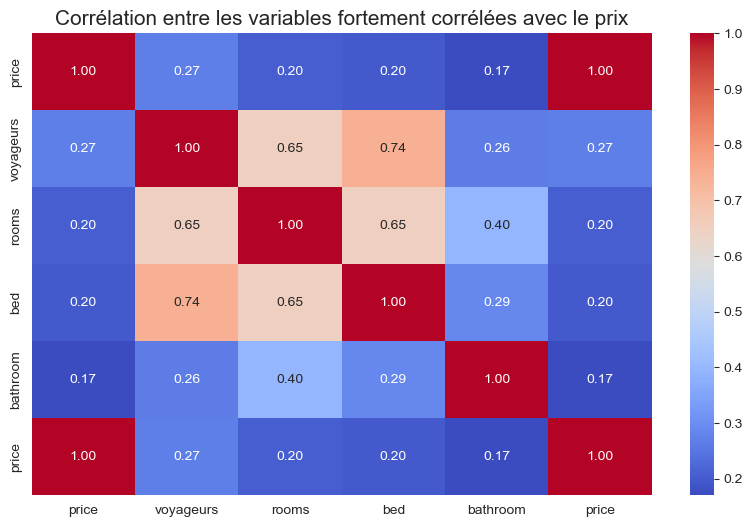

In [584]:
# Sélection des variables fortement corrélées avec le prix
corr_vars = ['price', 'voyageurs', 'rooms', 'bed', 'bathroom']
golden_features_list = df_num_corr[abs(df_num_corr) > 0.1].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

# Création d'une heatmap pour visualiser les corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(data[corr_vars + ['price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre les variables fortement corrélées avec le prix', fontsize=15)
plt.show()



# Analyse

Les variations du prix actuel sont fortement influencées par l'ancien prix, illustrant une corrélation très forte (0.89). De plus, une corrélation modérée positive existe entre le prix et le nombre de voyageurs (0.27), chambres (0.20) et lits (0.20), suggérant que les logements spacieux ont tendance à être plus chers. Les salles de bains ont également une légère corrélation positive avec le prix (0.17). Ces résultats confirment les tendances précédentes, soulignant les variables modestement corrélées avec le prix des logements.

# Matrice de corrélation entre les variables et le prix

C:\Users\essok\AppData\Local\Temp\ipykernel_3424\2435740254.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data2['pays'] = data2['pays'].replace(pays_to_num)


Matrice de corrélation entre les variables et le prix:
            old_price  voyageurs     rooms       bed  bathroom  new_rating  \
old_price    1.000000   0.240895  0.180174  0.191039  0.153824    0.136593   
voyageurs    0.240895   1.000000  0.652337  0.742069  0.261246   -0.010521   
rooms        0.180174   0.652337  1.000000  0.652050  0.396674   -0.020947   
bed          0.191039   0.742069  0.652050  1.000000  0.285154    0.033306   
bathroom     0.153824   0.261246  0.396674  0.285154  1.000000    0.008953   
new_rating   0.136593  -0.010521 -0.020947  0.033306  0.008953    1.000000   
pays         0.312089   0.123408  0.051130  0.071767 -0.044116   -0.116645   
price        0.893243   0.267646  0.204294  0.197814  0.170338    0.137988   

                pays     price  
old_price   0.312089  0.893243  
voyageurs   0.123408  0.267646  
rooms       0.051130  0.204294  
bed         0.071767  0.197814  
bathroom   -0.044116  0.170338  
new_rating -0.116645  0.137988  
pays       

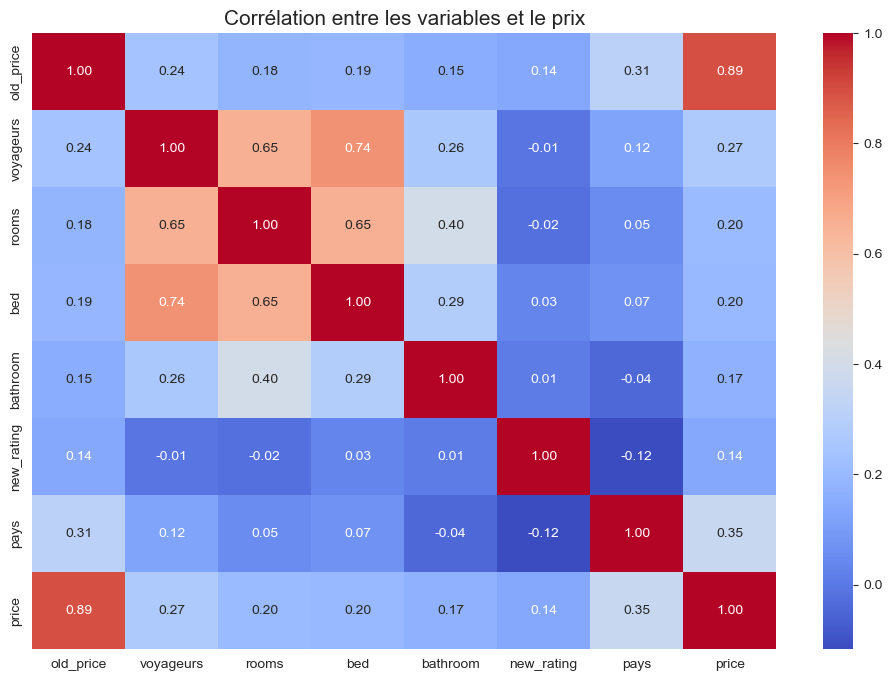

In [585]:
# Supposons que data est votre DataFrame initial
# Créez data2 avec les colonnes nécessaires
data2 = data[['price', 'old_price', 'voyageurs', 'rooms', 'bed', 'bathroom', 'new_rating', 'pays']].copy()

# Définissez le dictionnaire de correspondance
pays_to_num = {'Allemagne': 0, 'Belgique': 1, 'Autriche': 2, 'Suisse': 3, 'Italie': 4, 'Portugal': 5, 'Espagne': 6, 'France': 7}

# Remplacez les noms de pays par les numéros correspondants dans data2
data2['pays'] = data2['pays'].replace(pays_to_num)

# Convertissez la colonne 'pays' en type int pour éviter l'avertissement
data2['pays'] = data2['pays'].astype(int)

# Sélection des variables fortement corrélées avec le prix
corr_vars = ['old_price', 'voyageurs', 'rooms', 'bed', 'bathroom', 'new_rating', 'pays']

# Calculer la matrice de corrélation
correlation_matrix = data2[corr_vars + ['price']].corr()

# Afficher la matrice de corrélation sous forme de tableau
print("Matrice de corrélation entre les variables et le prix:")
print(correlation_matrix)

# Création d'une heatmap pour visualiser les corrélations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Corrélation entre les variables et le prix', fontsize=15)
plt.show()


# Analyse

Les variations du prix actuel sont fortement influencées par l'ancien prix, illustrant une corrélation très forte (0.89). Cela suggère que les changements dans l'ancien prix ont un impact direct sur le prix actuel des logements.

De plus, une corrélation modérée positive existe entre le prix et le nombre de voyageurs (0.27), le nombre de chambres (0.20) et le nombre de lits (0.20). Cela suggère que les logements plus spacieux ont tendance à être plus chers, ce qui est une observation intuitive.

Les salles de bains ont également une légère corrélation positive avec le prix (0.17). Cela indique que les logements avec un plus grand nombre de salles de bains peuvent avoir un prix légèrement plus élevé, bien que cette corrélation soit plus faible que celles observées avec d'autres variables.

Enfin, la corrélation entre le pays et le prix (0.35) est également notable, indiquant une influence du pays sur le prix des logements. Cependant, cette corrélation est plus faible par rapport à d'autres variables comme l'ancien prix.

# Corrélation entre les tout les variables et le prix

Matrice de corrélation entre les variables et le prix:
                                   price  old_price  voyageurs     rooms  \
price                           1.000000   0.893243   0.267646  0.204294   
old_price                       0.893243   1.000000   0.240895  0.180174   
voyageurs                       0.267646   0.240895   1.000000  0.652337   
rooms                           0.204294   0.180174   0.652337  1.000000   
bed                             0.197814   0.191039   0.742069  0.652050   
bathroom                        0.170338   0.153824   0.261246  0.396674   
new_rating                      0.137988   0.136593  -0.010521 -0.020947   
type_Bateau                    -0.015244   0.004149  -0.036347 -0.020225   
type_Camping                   -0.086601  -0.092602  -0.013357  0.013382   
type_Chambre dans appart'hôtel  0.020658   0.015129  -0.025684 -0.014292   
type_Chambre dans hôtel        -0.048271  -0.043943  -0.074518 -0.020225   
type_Château                   -0

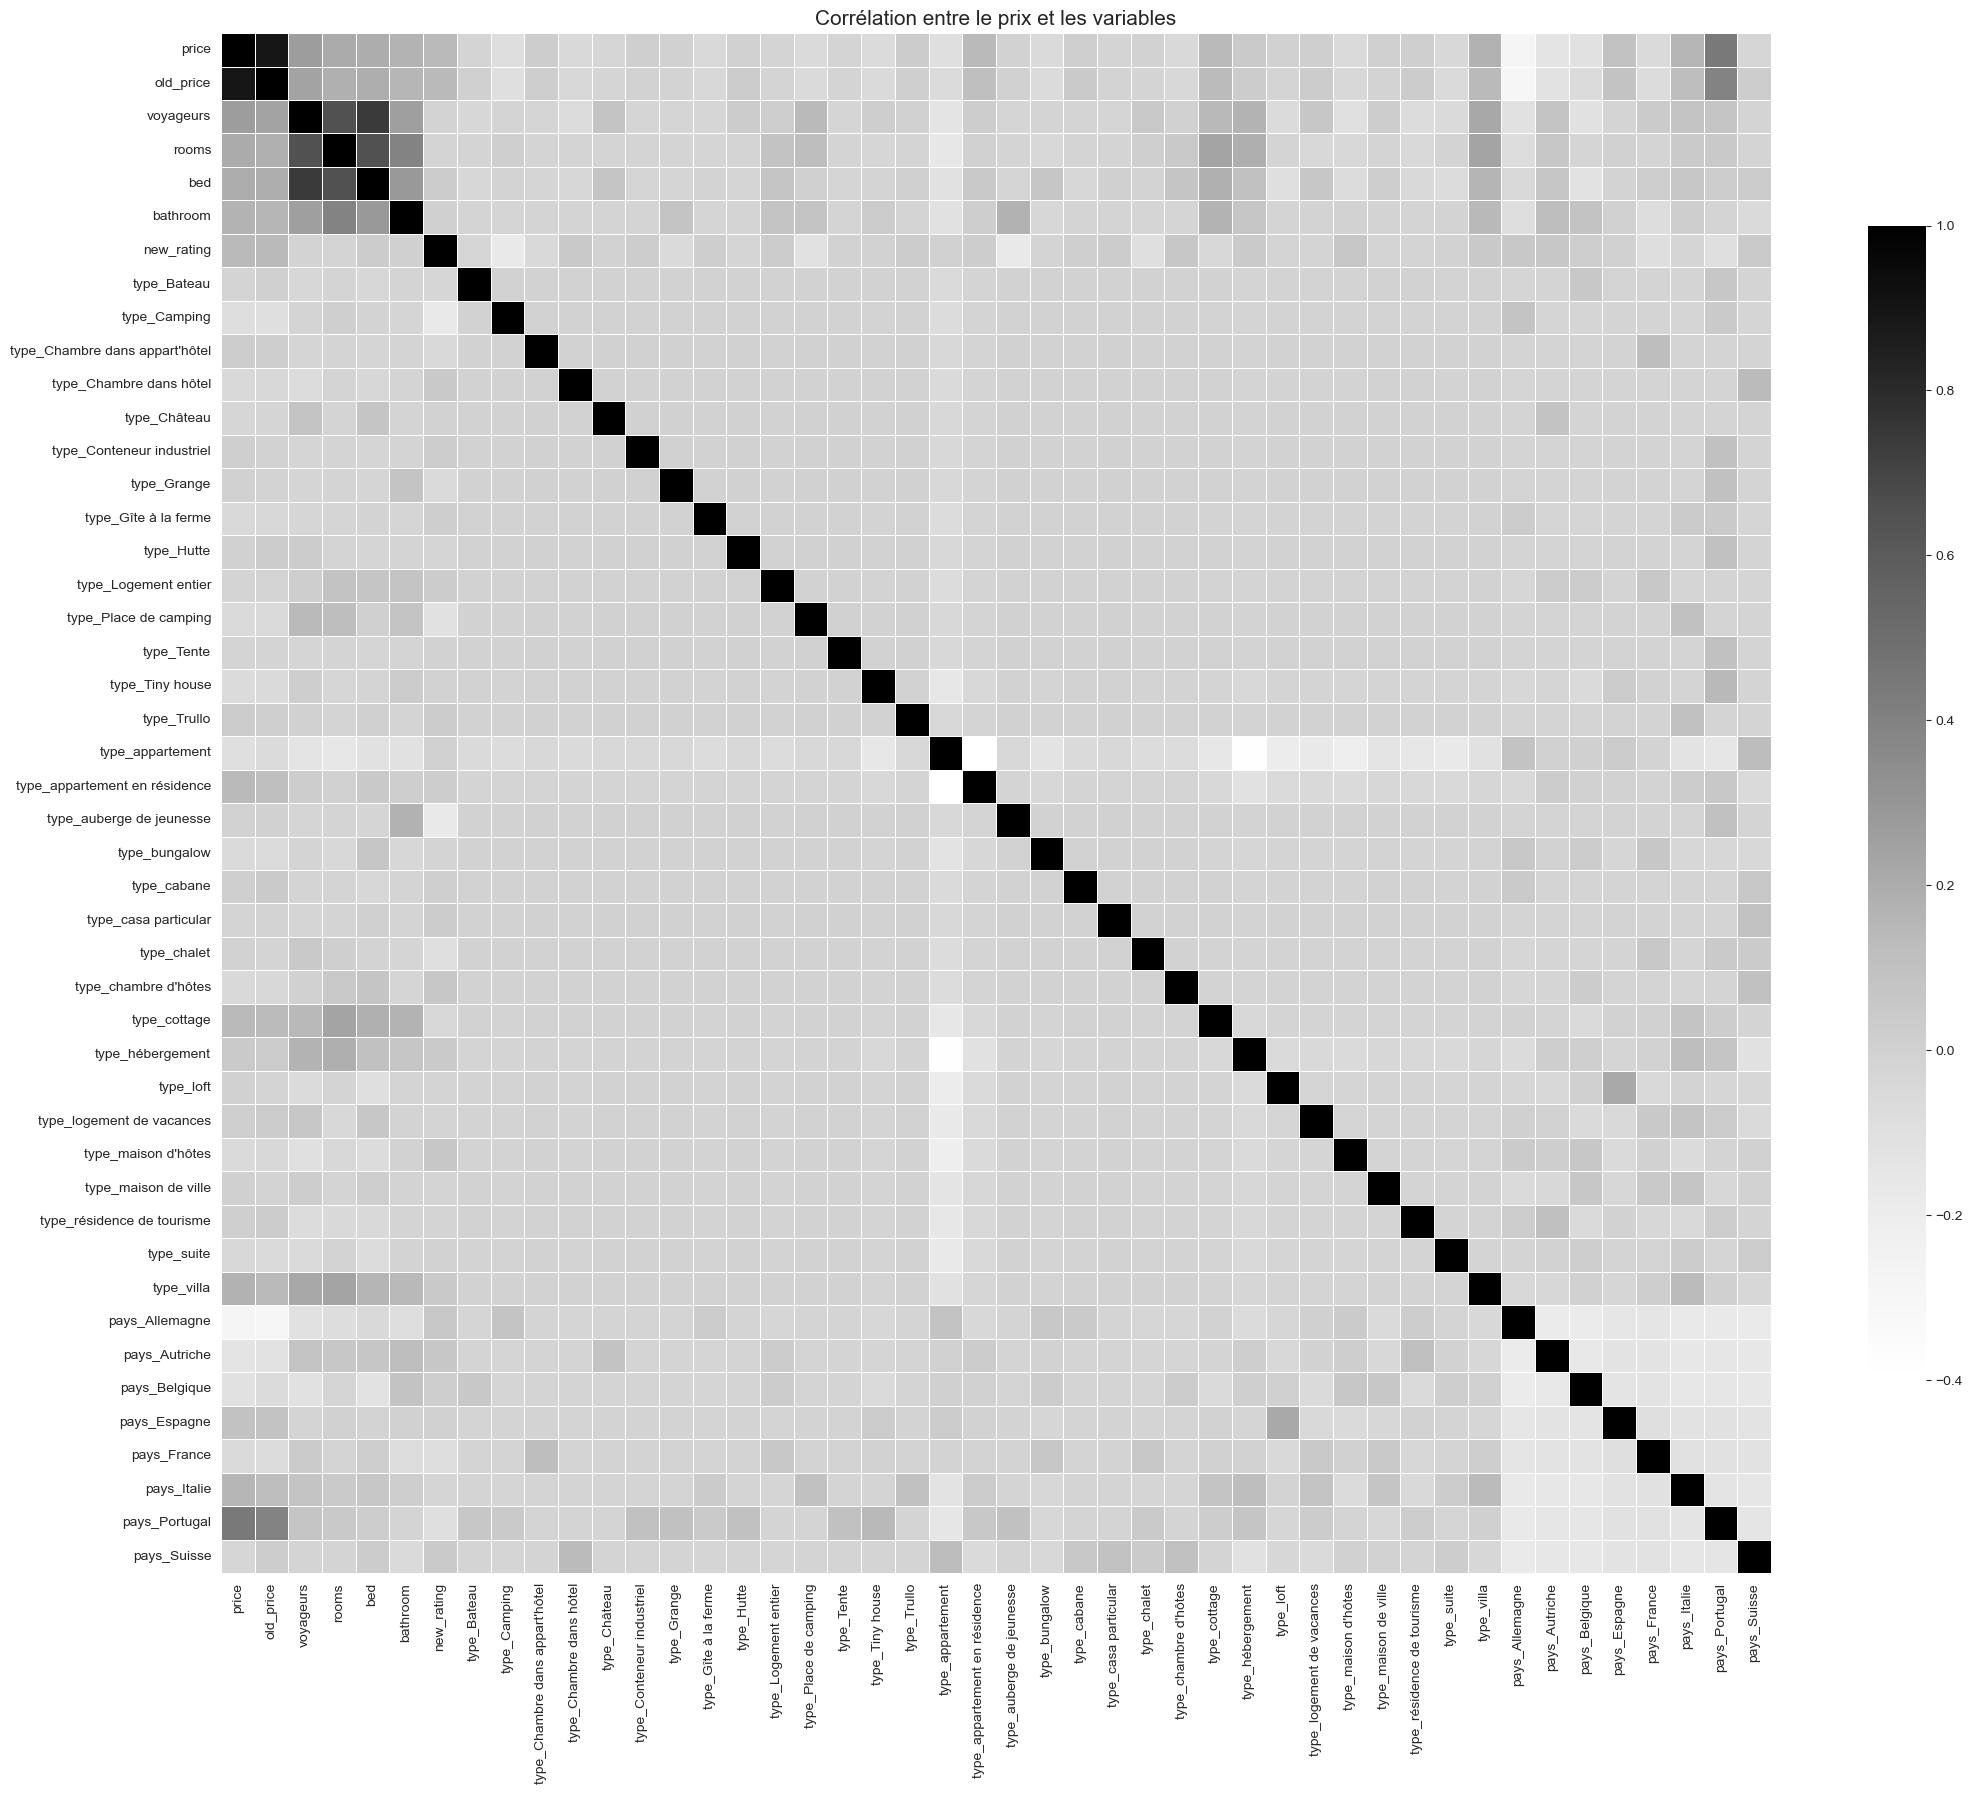

In [586]:
# Encoder les colonnes non numériques en variables binaires
type_dummies = pd.get_dummies(data['type'], prefix='type')
country_dummies = pd.get_dummies(data['pays'], prefix='pays')

# Concaténer les variables binaires avec le DataFrame original
data_encoded = pd.concat([data, type_dummies, country_dummies], axis=1)

# Sélectionner les colonnes pour la corrélation
cols = ['price', 'old_price', 'voyageurs', 'rooms', 'bed', 'bathroom', 'new_rating'] + list(type_dummies.columns) + list(country_dummies.columns)

# Calculer la corrélation entre le prix et les variables sélectionnées
correlation_price_vars = data_encoded[cols].corr()

# Afficher la matrice de corrélation sous forme de tableau
print("Matrice de corrélation entre les variables et le prix:")
print(correlation_price_vars)

# Afficher la heatmap de la corrélation entre le prix et les variables sélectionnées
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_price_vars, annot=False, cmap='Greys', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Corrélation entre le prix et les variables', fontsize=15)
plt.show()


# Analyse

Les variations actuelles des prix sont fortement influencées par les prix précédents, avec une corrélation très forte de 0,89. Cela suggère que les changements dans les prix précédents ont un impact direct sur les prix actuels des logements.

Une corrélation modérée positive est observée entre le prix et le nombre de voyageurs, le nombre de chambres et le nombre de lits, avec des coefficients de 0,27, 0,20 et 0,20 respectivement. Cette tendance indique que les logements plus spacieux ont tendance à être plus chers, une observation intuitive.

Les salles de bains présentent également une légère corrélation positive avec le prix, indiquant que les logements avec un plus grand nombre de salles de bains peuvent avoir un prix légèrement plus élevé, bien que cette corrélation soit plus faible que celles observées avec d'autres variables.


In [587]:
import pandas as pd

# Calculer la perte de revenus pour chaque logement
data['revenue_loss'] = data['old_price'] - data['price']

# Grouper les données par pays et calculer la somme des revenus et de la perte de revenus
revenue_data = data.groupby('pays').agg({'price': 'sum','old_price' : 'sum', 'revenue_loss': 'sum'}).reset_index()


# Afficher les résultats
print(revenue_data)


        pays     price  old_price  revenue_loss
0  Allemagne  154583.0   230998.0       76415.0
1   Autriche  150304.0   231585.0       81281.0
2   Belgique  159143.0   256296.0       97153.0
3    Espagne  143788.0   212607.0       68819.0
4     France  104186.0   149587.0       45401.0
5     Italie  205237.0   292338.0       87101.0
6   Portugal  261698.0   368140.0      106442.0
7     Suisse  167081.0   270455.0      103374.0


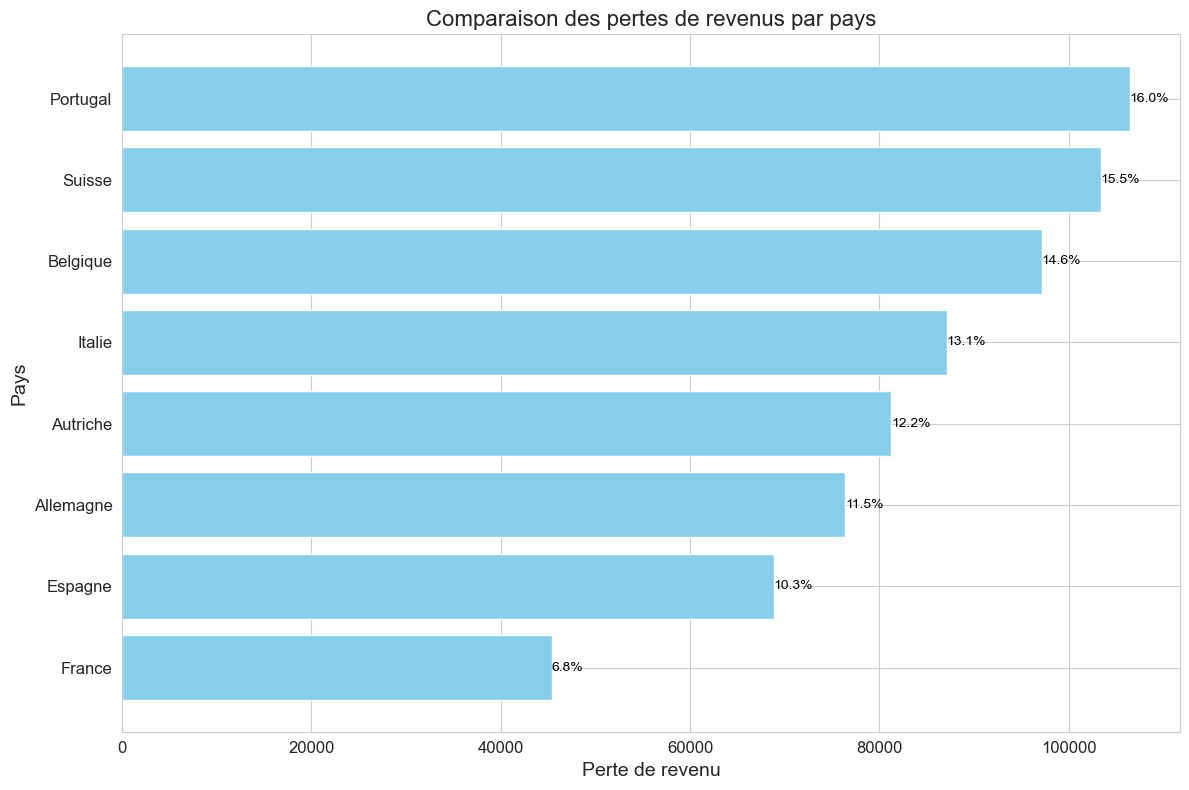

In [588]:
# Trier les données par ordre décroissant des pertes de revenus
sorted_data = revenue_data.sort_values(by='revenue_loss', ascending=False)

# Créer un graphique à barres horizontales pour les pertes de revenus par pays
plt.figure(figsize=(12, 8))
bars = plt.barh(sorted_data['pays'], sorted_data['revenue_loss'], color='skyblue')
plt.title('Comparaison des pertes de revenus par pays', fontsize=16)
plt.xlabel('Perte de revenu', fontsize=14)
plt.ylabel('Pays', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Inverser l'axe y pour afficher les pays dans l'ordre décroissant

# Annoter chaque barre avec son pourcentage
total_loss = sorted_data['revenue_loss'].sum()
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.1f}%'.format(width / total_loss * 100),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# Analyse 

Une approche potentielle pour réduire les pertes de revenus pourrait consister à identifier les facteurs qui contribuent le plus aux écarts de prix entre les pays. Une analyse plus approfondie des caractéristiques du marché, telles que la demande, la saisonnalité et la concurrence, pourrait aider à formuler des stratégies de tarification plus efficaces et à atténuer les pertes de revenus. Par exemple, en ajustant les prix en fonction des périodes de forte demande ou en offrant des promotions ciblées dans les régions où la concurrence est particulièrement intense, il est possible de maximiser les revenus tout en minimisant les pertes.

In [589]:
# Identifier le type de logement le mieux noté pour chaque pays
top_rated_per_country = data.loc[data.groupby('pays')['new_rating'].idxmax()]

# Afficher les résultats
print(top_rated_per_country[['pays', 'type', 'region', 'new_rating']])


          pays                      type               region  new_rating
534  Allemagne               appartement             Chemnitz         5.0
333   Autriche               hébergement             Zehethof         5.0
71    Belgique               hébergement          Cerfontaine         5.0
25     Espagne               appartement               Madrid         5.0
279     France           Logement entier  La Chapelle-Villars         5.0
183     Italie               appartement               Naples         5.0
672   Portugal  appartement en résidence            Albufeira         5.0
434     Suisse               appartement               Bühler         5.0


In [590]:
# Identifier le type de logement le moins bien noté pour chaque pays
bottom_rated_per_country = data.loc[data.groupby('pays')['new_rating'].idxmin()]

# Afficher les résultats
print(bottom_rated_per_country[['pays', 'type', 'region', 'new_rating']])


          pays                   type                               region  \
611  Allemagne            appartement                          Halberstadt   
408   Autriche  résidence de tourisme                                 Graz   
98    Belgique            appartement                                Namur   
31     Espagne            appartement                               Madrid   
317     France            appartement                             Toulouse   
213     Italie            appartement                        Pietra Ligure   
701   Portugal                Camping  car/caravane - Carrazeda de Ansiães   
487     Suisse            appartement                             Koppigen   

     new_rating  
611        4.25  
408        4.40  
98         4.23  
31         4.14  
317        4.00  
213        4.04  
701        3.33  
487        4.17  


# Analyse 

En examinant les résultats, on observe que chaque pays présente une diversité de types de logement, avec des différences significatives dans les niveaux de satisfaction des utilisateurs. Par exemple, en Espagne, les appartements à Madrid sont particulièrement bien notés avec une moyenne de 5,0, tandis que les appartements à Madrid ont la note la plus basse avec 4,14. En Suisse, les appartements à Bühler sont les mieux notés avec 5,0, tandis que ceux à Koppigen ont la note la plus basse avec 4,17. Cette analyse suggère qu'il existe des variations importantes dans la qualité des logements offerts dans différents pays et régions, ce qui peut influencer les choix des voyageurs et les décisions d'investissement dans le secteur de l'hébergement.

# Analyse générale 

En se basant sur les données fournies, il est clair que plusieurs facteurs influencent les prix des logements Airbnb en Europe, notamment la disponibilité des logements, les caractéristiques géographiques et les services proposés. Dans chaque région ou pays, des tendances spécifiques peuvent être observées. Par exemple, les destinations touristiques populaires comme Albufeira au Portugal ont tendance à afficher des prix plus élevés en raison de leur attrait touristique, tandis que des endroits moins développés comme Saône en France ont des prix plus bas.

Pour une analyse future et des prédictions précises des facteurs influençant les prix, il serait important d'explorer en profondeur les données disponibles, en mettant l'accent sur les caractéristiques spécifiques à chaque région ou pays. Une exploration approfondie de ces données permettrait de déterminer quels facteurs ont le plus d'impact sur l'augmentation des prix dans chaque région ou pays, ouvrant ainsi la voie à des analyses plus ciblées et à des prédictions plus précises

<span style="color:green; font-weight:bold; font-size:10pt">Quels facteurs ont le plus d'impact sur l'augmentation des prix des logements Airbnb dans chaque région ou pays d'Europe, et comment ces facteurs peuvent-ils être intégrés dans des modèles d'analyse et de prédiction pour une tarification plus précise ?</span>

